# Problem Statement
Device crashes can lead to significant downtime and loss of productivity, especially in environments where the device plays a critical role in daily operations. Predicting when a device might crash, based on various operational and environmental factors, can help mitigate these issues by enabling preemptive measures. 
The EDA exercise aims to analyze the data considering specific parameters of a mobile device ultimately to understans the features better and enable to predict device crash when required


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

# The Mobile Crash Data
The data has been simulated through prompt engineering real time scenarios using LLMs. As a team we discussed the varios factors in a real world scenario which can lead to low performance of a mobile device. The below step enlists the columns and values of the factors like CPU Usage, APP Name (Running in the device), Memory Usage, Battery Level , Temperature , Disk Space and more

In [4]:
#Load the data set
df = pd.read_csv('eda/mobile_crash_data_0927_v3.csv')
print(df)

          App_Name  CPU_Usage  Memory_Usage  Battery_Level  Temperature  \
0          Netflix  35.473619     52.048420      30.172434    22.554281   
1          Twitter  98.132710     35.675450      42.987039    50.852821   
2          Discord  61.316465     60.209320      33.431911    42.385092   
3            Slack  86.208830     52.385562      65.454958    48.859789   
4           Amazon  77.266467     57.531209       3.687373    47.114118   
...            ...        ...           ...            ...          ...   
11555  Google Maps  89.834407     61.401764     122.810369    31.082843   
11556       Amazon  50.210780     49.393401     110.043715    14.901975   
11557      Netflix  60.857851     71.204257     129.408817    21.294194   
11558         Uber  72.522893     39.601110     115.882346    45.646152   
11559     Snapchat  75.175787     36.511043     136.678449    33.987108   

       Disk_Space  Network_Signal  App_Version  Error_Logs Device_Model  \
0      484.092409       

# Establishing the Need for Data Understanding in Mobile Device Crash Prediction
Mobile device data might have missing values, outliers, or noisy entries (e.g., extreme temperature readings, erroneous app usage counts). Understanding the data helps identify and rectify these issues to avoid biased predictions.
The below steps involves generating the summary statistics which includes COUNT, # of UNIQUE VALUE , # FREQUENCY, MIN, MAX values etc.
The steps intend to establish understanding on the spread of data, identify data imbalance if any and also process data in a way that can lead to meaningful results 


In [5]:
# Summary statistics - 
#This will do find mean and Quantiles finding central tendencies and dispersion
print("\nSummary Statistics:")
print(df.describe(include='all'))



Summary Statistics:
       App_Name     CPU_Usage  Memory_Usage  Battery_Level   Temperature  \
count     11560  11329.000000  11329.000000   11560.000000  11329.000000   
unique       15           NaN           NaN            NaN           NaN   
top     Discord           NaN           NaN            NaN           NaN   
freq        807           NaN           NaN            NaN           NaN   
mean        NaN     62.397586     56.959348      50.304638     36.832064   
std         NaN     16.272409      9.880617      28.954965      9.403873   
min         NaN      4.310223     24.027532       0.000000     10.115146   
25%         NaN     51.389702     50.215708      25.270028     31.205169   
50%         NaN     62.486420     56.980808      50.390288     37.597585   
75%         NaN     73.819859     63.572382      74.859107     43.533911   
max         NaN     99.952131     94.278519     149.286188     55.000000   

          Disk_Space  Network_Signal   App_Version    Error_Logs D

# Histogram -  For Understanding the Distribution of Data we have used Histograms for the below reasons:
#### Normality Check: Many machine learning models (like linear regression, logistic regression) assume that the input features are normally distributed. A histogram helps to visually assess whether the data follows a normal distribution or if it's skewed.
#### Skewness Detection: Data might be left-skewed or right-skewed, indicating that most values are concentrated towards the lower or upper end of the range, respectively. This can impact how you preprocess the data (e.g., applying transformations like log or square root).

We have considered numeric and continuous variables like CPU Usage, Memory Usage, Battery Level, Disk Space for evaluation of the space the data is spread. This shall further help decide on the next steps of discretization, label encoding, normalization etc.

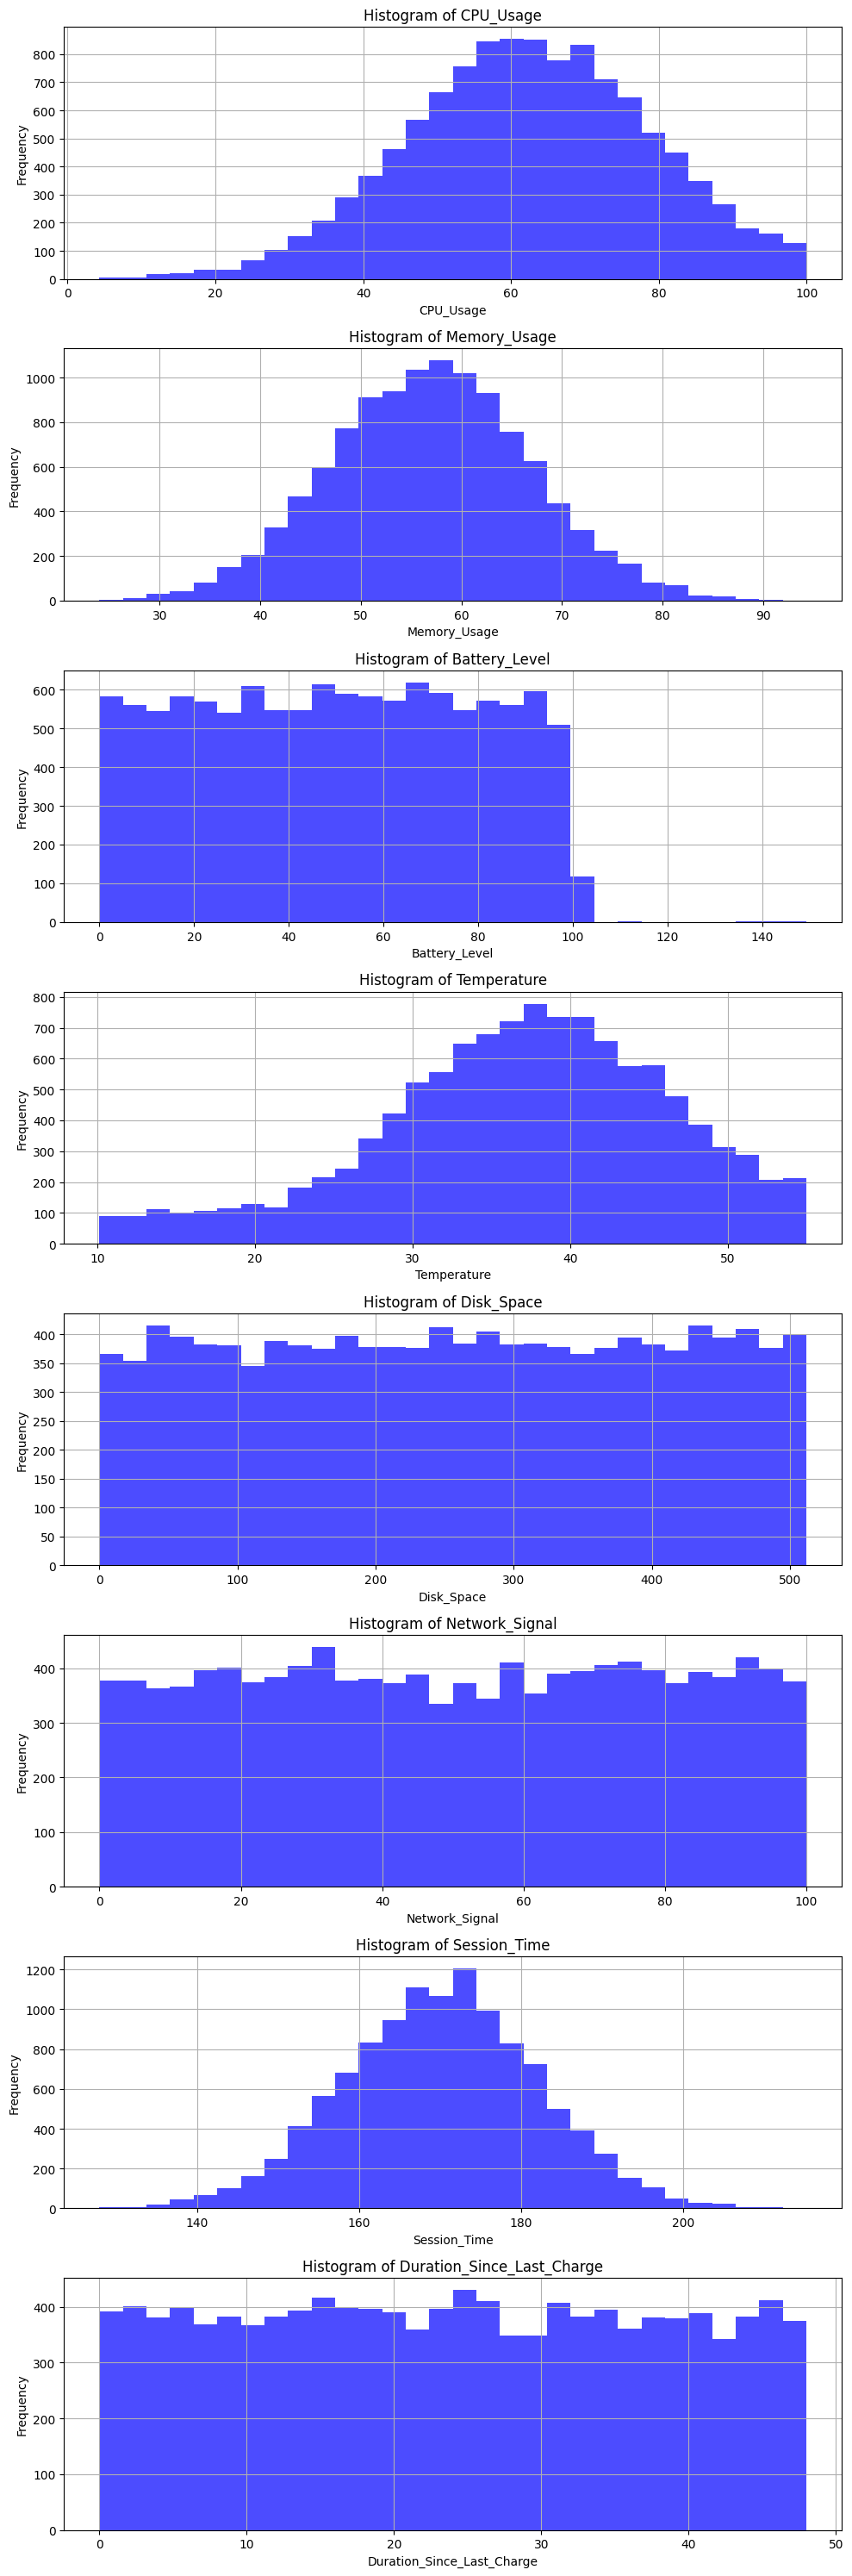

In [31]:
# Print Histograms for all numerical data (visualize data)
numeric_columns = df.select_dtypes(include='number').columns.tolist()
non_binary_non_discrete_numerical_columns = [col for col in numeric_columns if df[col].nunique() > 10]

fig, axes = plt.subplots(nrows=len(non_binary_non_discrete_numerical_columns), ncols=1, figsize=(10, 30))
# Iterate over numeric columns and create histograms
for i, column in enumerate(non_binary_non_discrete_numerical_columns):
    df[column].hist(ax=axes[i], bins=30, color='blue', alpha=0.7)
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Outlier detection and measuring Central Tendency. Here are the details of the BOX PLOT and the inferencing of the outcome from the plot:
#### Central Tendency: The box in the plot represents the interquartile range (IQR) and the line inside it indicates the median (50th percentile), providing a sense of where most data points cluster.For example median for CPU usage is approximately 61-65 and the IQR can be found between 50 and 70

#### Spread of the Data: The length of the box shows the range of the middle 50% of the data (from the 25th percentile to the 75th percentile), while the "whiskers" extend to show the variability outside the upper and lower quartiles. The data for Temperature, CPU_Usage, Disk Space shows the outliers in the lower quartiles. For Memory Usage there are instances where the outliers are observed in the upper quartiles

#### Outliers: Data points outside the whiskers are considered potential outliers. These are flagged with individual dots, helping to identify anomalies or rare occurrences in the dataset.

#### Skewness & Symmetry: The position of the median line within the box and the length of the whiskers help assess the skewness of the data. If the median is not centered or one whisker is longer, the data may be skewed either left or right.

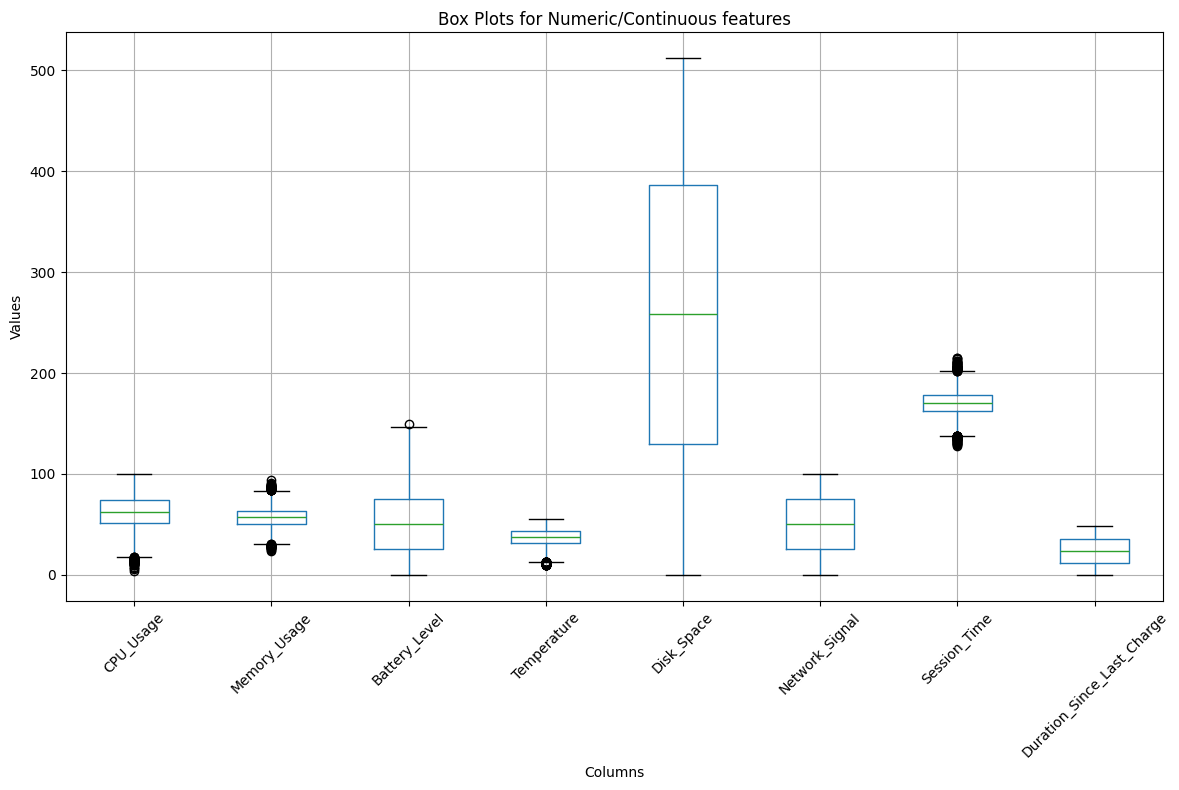

In [41]:
# Box Plot of numeric coloumns
import pandas as pd
import matplotlib.pyplot as plt

# Get numeric columns
numeric_columns = df.select_dtypes(include='number').columns.tolist()
non_binary_non_discrete_numerical_columns = [col for col in numeric_columns if df[col].nunique() > 10]
new_df = df[non_binary_non_discrete_numerical_columns]
fig, ax = plt.subplots(figsize=(12, 8))
# Create box plots
new_df.boxplot(ax=ax)
plt.title("Box Plots for Numeric/Continuous features")
plt.xlabel("Columns")
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Outlier is often defined as any point that falls outside 1.5 times the interquartile range (IQR) above the 75th percentile (upper quartile) or below the 25th percentile (lower quartile) in a box plot. In normal distributions, points that are more than three standard deviations away from the mean

### In above summary Battery Level max is showing percentage as 149.286188, 
### while max percentage can only be 100
### Find number of records greater than 100 for Battery Level and remove those

In [20]:
# Find records greater than 100 in 'Battery Level'
outliers = df[df['Battery_Level'] > 100]
print("\nRecords greater than 100:")
print(outliers)

# Remove records greater than 100
cleaned_data = df[df['Battery_Level'] <= 100]

outliers = cleaned_data[cleaned_data['Battery_Level'] > 100]
print("\nRecords greater than 100:")
print(outliers)


Records greater than 100:
          App_Name  CPU_Usage  Memory_Usage  Battery_Level  Temperature  \
11548  Google Maps  48.011931     58.748810     149.286188    42.857147   
11549  Google Maps  65.887411     41.890789     146.987775    29.509652   
11550    Instagram  60.731433     83.903662     138.980624    32.345326   
11551     Snapchat  47.562555     58.257913     141.555246    31.934551   
11552      Netflix  61.236555     46.871596     139.083107    46.182101   
11553     Telegram  82.449084     63.896671     142.135888    19.950297   
11554      Spotify  49.956265     54.270078     112.648205    23.982544   
11555  Google Maps  89.834407     61.401764     122.810369    31.082843   
11556       Amazon  50.210780     49.393401     110.043715    14.901975   
11557      Netflix  60.857851     71.204257     129.408817    21.294194   
11558         Uber  72.522893     39.601110     115.882346    45.646152   
11559     Snapchat  75.175787     36.511043     136.678449    33.987108  

## Missing Value Detection , Cleaning and Imputation

In [22]:
# Checking for missing values
print("\nMissing Values:")
print(cleaned_data.isnull().sum())


Missing Values:
App_Name                        0
CPU_Usage                     231
Memory_Usage                  231
Battery_Level                   0
Temperature                   231
Disk_Space                      0
Network_Signal                  0
App_Version                     0
Error_Logs                      0
Device_Model                    0
Session_Time                    0
Num_App_Crashes                 0
Duration_Since_Last_Charge      0
App_Usage_Level                 0
Crash_Label                     0
dtype: int64


In [24]:
cleaned_data['CPU_Usage']=cleaned_data['CPU_Usage'].fillna(cleaned_data['CPU_Usage'].mean())

cleaned_data['Memory_Usage']=cleaned_data['Memory_Usage'].fillna(cleaned_data['Memory_Usage'].median())

cleaned_data['Temperature']=cleaned_data['Temperature'].ffill()

print("\nMissing Values:")
print(cleaned_data.isnull().sum())

## round to 2 decimal digit
cleaned_data = cleaned_data.round(2)


Missing Values:
App_Name                      0
CPU_Usage                     0
Memory_Usage                  0
Battery_Level                 0
Temperature                   0
Disk_Space                    0
Network_Signal                0
App_Version                   0
Error_Logs                    0
Device_Model                  0
Session_Time                  0
Num_App_Crashes               0
Duration_Since_Last_Charge    0
App_Usage_Level               0
Crash_Label                   0
dtype: int64


C:\Users\dbanerjee\AppData\Local\Temp\ipykernel_24008\1756118156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['CPU_Usage']=cleaned_data['CPU_Usage'].fillna(cleaned_data['CPU_Usage'].mean())
C:\Users\dbanerjee\AppData\Local\Temp\ipykernel_24008\1756118156.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Memory_Usage']=cleaned_data['Memory_Usage'].fillna(cleaned_data['Memory_Usage'].median())
C:\Users\dbanerjee\AppData\Local\Temp\ipykernel_24008\1756118156.py:6: SettingWit

## Identify outliers in all numeric coloumns


In [20]:
# Identify outliers in all numeric coloumns
numeric_cols = cleaned_data.select_dtypes(include=np.number).columns
print(f"cleaned_data summary")
print(f"=======================================================================")
print(cleaned_data.describe())
for col in numeric_cols:
    Q1 = cleaned_data[col].quantile(0.25)
    Q3 = cleaned_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"\n{col}, Outliers Range[lb, ub] => [{lower_bound},  {upper_bound}] ")
    print(f"=====================================================================")
    filtered_df = cleaned_data[(cleaned_data[col] < lower_bound) | (cleaned_data[col] > upper_bound)]
    print(filtered_df.head(5))
    print(f"\n")

cleaned_data summary
          CPU_Usage  Memory_Usage  Battery_Level   Temperature    Disk_Space  \
count  11548.000000  11548.000000   11548.000000  11548.000000  11548.000000   
mean      62.396289     56.961279      50.219586     36.852836    257.815931   
std       16.111538      9.777106      28.846494      9.388316    147.880772   
min        4.310000     24.030000       0.000000     10.120000      0.050000   
25%       51.667500     50.370000      25.267500     31.247500    129.892500   
50%       62.400000     56.980000      50.375000     37.600000    258.065000   
75%       73.480000     63.402500      74.780000     43.550000    386.512500   
max       99.950000     94.280000     100.000000     55.000000    511.930000   

       Network_Signal   App_Version    Error_Logs  Session_Time  \
count    11548.000000  11548.000000  11548.000000   11548.00000   
mean        50.303787      1.327684      0.505715     170.06870   
std         28.935622      0.398166      0.499989      12

# Binning involves grouping continuous data into discrete categories or bins.
# Discretization is a process of converting continuous variables into discrete #. Involves binning and converting values into predefined categories based on certain criteria.
### Distance binning
###  Formula -> interval = (max-min) / Number of Bins
### Let us consider the 'Battery Level' continuous value column for binning

In [26]:

min_value = cleaned_data['Battery_Level'].min()
max_value = cleaned_data['Battery_Level'].max()
print(min_value)
print(max_value)

# Suppose the bin size is 5
# linspace returns evenly spaced numbers over a specified interval. 
# Returns num evenly spaced samples, calculated over the interval [start, stop].
bins = np.linspace(min_value,max_value,7)
print(bins)

0.0
100.0
[  0.          16.66666667  33.33333333  50.          66.66666667
  83.33333333 100.        ]


## Labeling and grouping into fixed categories

In [28]:
labels = ['Extreme Low', 'Very Low', 'Low', 'Moderate', 'Sufficient', 'Full'];

# We need to specify the bins and the labels.
cleaned_data['Battery_Level'] = pd.cut(cleaned_data['Battery_Level'], bins=bins, labels=labels, include_lowest=True)
print(cleaned_data['Battery_Level'])


0           Very Low
1                Low
2                Low
3           Moderate
4        Extreme Low
            ...     
11543           Full
11544       Very Low
11545     Sufficient
11546       Moderate
11547           Full
Name: Battery_Level, Length: 11548, dtype: category
Categories (6, object): ['Extreme Low' < 'Very Low' < 'Low' < 'Moderate' < 'Sufficient' < 'Full']


## Use Label Encoder to make all categorical attributes as numerical


In [30]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  
cleaned_data['App_Usage_Level']=le.fit_transform(cleaned_data['App_Usage_Level'])

cleaned_data['Device_Model']=le.fit_transform(cleaned_data['Device_Model'])

cleaned_data['App_Name']=le.fit_transform(cleaned_data['App_Name'])

cleaned_data['Battery_Level']=le.fit_transform(cleaned_data['Battery_Level'])

# Validate if now all attributes are numerical
print("\nData Types:")
print(cleaned_data.dtypes)

print(cleaned_data)


Data Types:
App_Name                        int32
CPU_Usage                     float64
Memory_Usage                  float64
Battery_Level                   int32
Temperature                   float64
Disk_Space                    float64
Network_Signal                float64
App_Version                   float64
Error_Logs                      int64
Device_Model                    int32
Session_Time                  float64
Num_App_Crashes                 int64
Duration_Since_Last_Charge    float64
App_Usage_Level                 int32
Crash_Label                   float64
dtype: object
       App_Name  CPU_Usage  Memory_Usage  Battery_Level  Temperature  \
0             6      35.47         52.05              5        22.55   
1            11      98.13         35.68              2        50.85   
2             1      61.32         60.21              2        42.39   
3             7      86.21         52.39              3        48.86   
4             0      77.27         57.53   

 ## Pearson correlation, often referred to as Pearson's r, is a statistical measure that assesses the strength and direction of the linear relationship between two continuous variables. It quantifies how closely related the two variables are, producing a value between -1 and +1.
 ## Below we are depicting CORRELATION (PEARSON) using SCIPY and VARS are CPU Usage and Temperature

Pearson correlation: 0.594


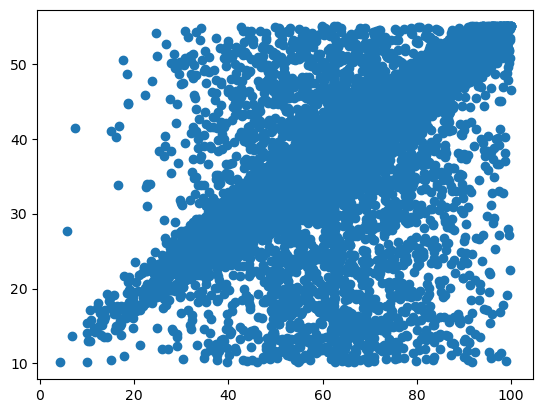

In [32]:
from scipy.stats import pearsonr
# Convert dataframe into series
list1 = cleaned_data['CPU_Usage']
list2 = cleaned_data['Temperature']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearson correlation: %.3f' % corr)

# Pearson correlation: 0.205 (Moderate Positive correlation)
# Interpretaton:
# As the CPU usage of the device increases, heat also increases

# Draw a Plot of the relationship
# 'CPU' on the X Axis and 'Memory' on the Y axis
from matplotlib import pyplot
pyplot.scatter(list1, list2)
pyplot.show()

## Normalize Numerical Data
## copy the data

In [34]:
# Normalize Numerical Data
# copy the data
df_min_max_scaled = cleaned_data.copy()

# Loop through each numerical column
for column in df_min_max_scaled.select_dtypes(include=['int64', 'float64']).columns:
    min_val = df[column].min()
    max_val = df[column].max()
    df_min_max_scaled[column] = (df[column] - min_val) / (max_val - min_val)

# Display the normalized DataFrame
print("\nNormalized DataFrame:")
print(df_min_max_scaled)


Normalized DataFrame:
       App_Name  CPU_Usage  Memory_Usage  Battery_Level  Temperature  \
0             6   0.325834      0.398868              5     0.277134   
1            11   0.980977      0.165804              2     0.907604   
2             1   0.596038      0.515036              2     0.718950   
3             7   0.856305      0.403667              3     0.863201   
4             0   0.762806      0.476914              0     0.824309   
...         ...        ...           ...            ...          ...   
11543         4   0.723357      0.482809              1     0.422202   
11544        12   0.629282      0.323689              5     0.560952   
11545         4   0.274414      0.786581              4     0.884449   
11546         0   0.347792      0.340397              3     0.281663   
11547         7   0.668278      0.506244              1     0.249410   

       Disk_Space  Network_Signal  App_Version  Error_Logs  Device_Model  \
0        0.945619        0.773844   

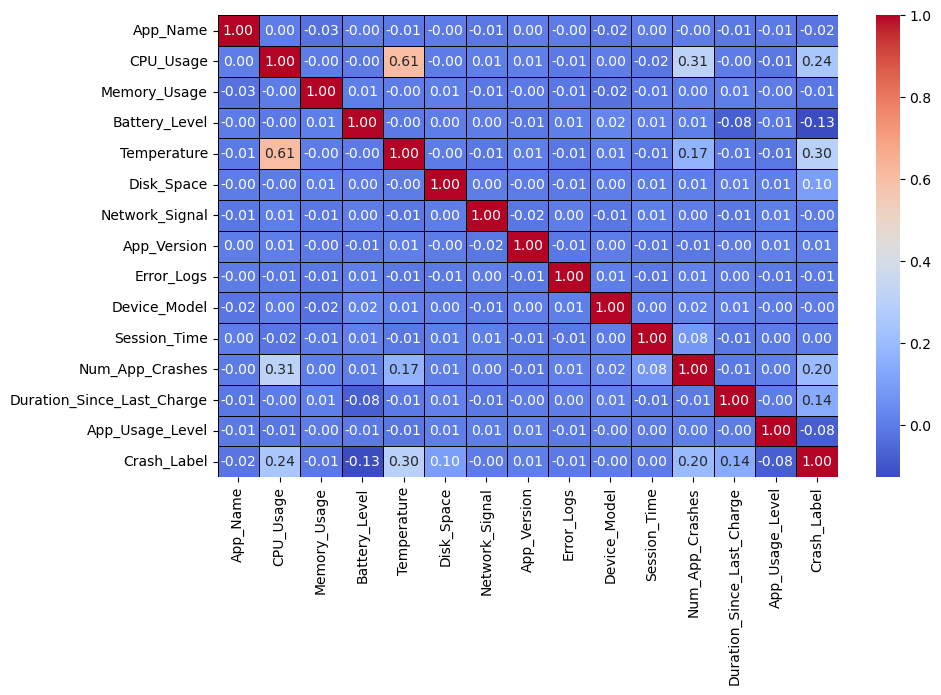

In [36]:
from tkinter import TRUE 
# Correlation Matrix - Internally uses Pearson Correlation
cor = df_min_max_scaled.corr()

# Plotting Heatmap
plt.figure(figsize = (10,6))
#sns.heatmap(cor, annot=True)
sns.heatmap(
    cor,
    annot=True,              # Annotate cells with their values
    fmt=".2f",              # Format for annotation
    cmap='coolwarm',        # Color map
    cbar=True,              # Show color bar
    linewidths=.5,          # Lines between cells
    linecolor='black',       # Color of the lines
    square=False,            # Make cells square-shaped
    xticklabels=True,       # Show x-tick labels
    yticklabels=True        # Show y-tick labels
)
plt.show()

In [81]:
print(df)

       CPU_Usage  Memory_Usage  Battery_Level  Temperature  Disk_Space  \
0      35.473619     52.048420      30.172434    22.554281  484.092409   
1      98.132710     35.675450      42.987039    50.852821  315.257899   
2      61.316465     60.209320      33.431911    42.385092   13.540148   
3      86.208830     52.385562      65.454958    48.859789  333.167681   
4      77.266467     57.531209       3.687373    47.114118  483.712841   
...          ...           ...            ...          ...         ...   
11555  89.834407     61.401764     122.810369    31.082843  366.066313   
11556  50.210780     49.393401     110.043715    14.901975  130.154397   
11557  60.857851     71.204257     129.408817    21.294194  229.378999   
11558  72.522893     39.601110     115.882346    45.646152   82.117291   
11559  75.175787     36.511043     136.678449    33.987108  130.103462   

       Network_Signal  App_Version  Error_Logs Device_Model  Session_Time  \
0           77.382580          1.1

In [103]:
print(df.columns)
print(df.columns[0])
 

Index(['CPU_Usage', 'Memory_Usage', 'Battery_Level', 'Temperature',
       'Disk_Space', 'Network_Signal', 'App_Version', 'Error_Logs',
       'Device_Model', 'Session_Time', 'Num_App_Crashes',
       'Duration_Since_Last_Charge', 'App_Usage_Level', 'Crash_Label',
       'App_Name_Discord', 'App_Name_Facebook', 'App_Name_Google Maps',
       'App_Name_Instagram', 'App_Name_Lyft', 'App_Name_Netflix',
       'App_Name_Slack', 'App_Name_Snapchat', 'App_Name_Spotify',
       'App_Name_Telegram', 'App_Name_Twitter', 'App_Name_Uber',
       'App_Name_WhatsApp', 'App_Name_YouTube'],
      dtype='object')
CPU_Usage


In [121]:
from sklearn.ensemble import RandomForestRegressor
# define the model
model = RandomForestRegressor()


In [170]:
X = df.iloc[:,[0,1,2,3,4,5,9,10]] 
Y = df.iloc[:,[14]]  

C:\Users\dbanerjee\OneDrive - Microsoft\Anaconda\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Feature: 0, Score: 0.13539
Feature: 1, Score: 0.14036
Feature: 2, Score: 0.13788
Feature: 3, Score: 0.12473
Feature: 4, Score: 0.15052
Feature: 5, Score: 0.14163
Feature: 6, Score: 0.13937
Feature: 7, Score: 0.03012


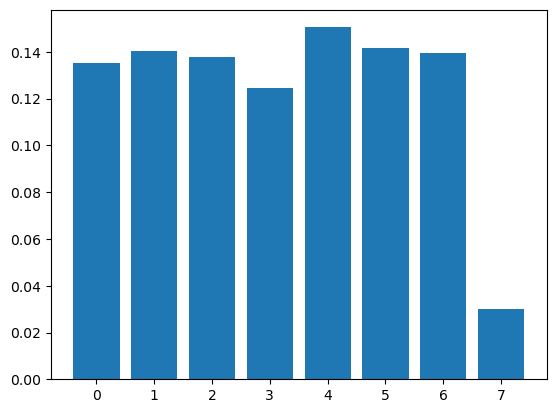

In [172]:
from sklearn.ensemble import RandomForestRegressor
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X,Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


Feature: 0, Score: 0.13539
Feature: 1, Score: 0.14036
Feature: 2, Score: 0.13788
Feature: 3, Score: 0.12473
Feature: 4, Score: 0.15052
Feature: 5, Score: 0.14163
Feature: 6, Score: 0.13937
Feature: 7, Score: 0.03012


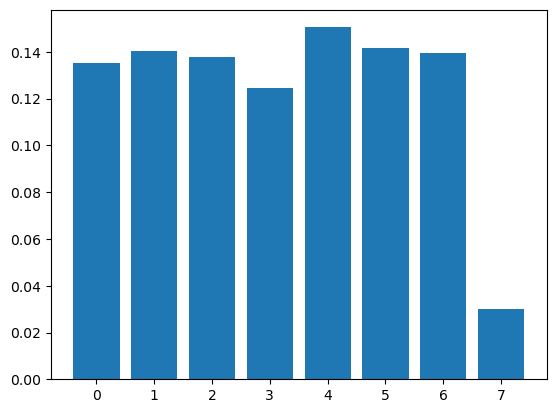

In [174]:
from sklearn.tree import DecisionTreeClassifier
# define the model
model1 = DecisionTreeClassifier()
# fit the model
model1.fit(X,Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
